In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#data loading
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#data cleanup
df["job_posted_date"]= pd.to_datetime(df["job_posted_date"]) 

In [2]:
df_us = df[df["job_country"]== "United States"].copy()

In [3]:
df_us["job_posted_month"] = df_us["job_posted_date"].dt.strftime("%B")
df_us_pivot =df_us.pivot_table( index="job_posted_month" , columns="job_title_short", aggfunc="size")

In [4]:
df_us_pivot.reset_index(inplace=True)

In [6]:
df_us_pivot["month_no"] = pd.to_datetime(df_us_pivot["job_posted_month"], format= "%B").dt.month

In [7]:
df_us_pivot.sort_values("month_no",inplace=True)
df_us_pivot.set_index("job_posted_month", inplace=True)


In [8]:
df_us_pivot.drop(columns="month_no",inplace=True)

In [9]:
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [33]:
df_us_software_pivot = pd.read_csv("https://lukeb.co/software_.csv" , index_col="job_posted_month")

In [34]:
df_us_merged = df_us_pivot.merge(df_us_software_pivot, on = "job_posted_month")

In [39]:
top_5 =df_us_merged.sum().sort_values(ascending=False).head(5).index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

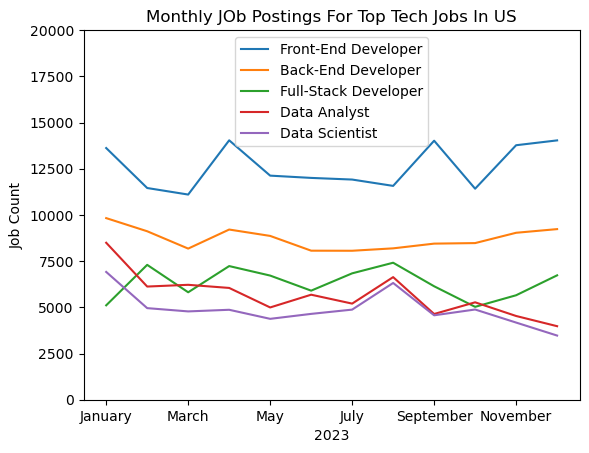

In [42]:
df_us_merged[top_5].plot(kind="line")
plt.title("Monthly JOb Postings For Top Tech Jobs In US")
plt.xlabel("2023")
plt.ylim(0,20000)
plt.ylabel("Job Count")
plt.legend()
plt.show()